# Introduction

# The structure of an ANN



## The artificial neuron

$$f(z) = \frac{1}{1+e^{-z}}$$

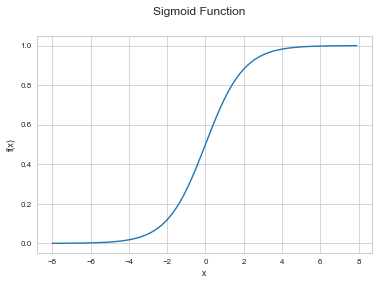

In [4]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style("whitegrid")
%matplotlib inline
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.gcf().suptitle('Sigmoid Function')
plt.show()


## Nodes
$$h_{w,b}(x) = x_1w_1+x_2w_2+x_3w_3+b$$

## The bias

$$h_{w}(x) = x_1w_1$$

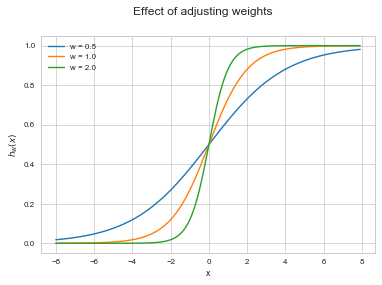

In [7]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('$h_{w}(x)$')
plt.legend(loc=2)
plt.gcf().suptitle('Effect of adjusting weights')

plt.show()

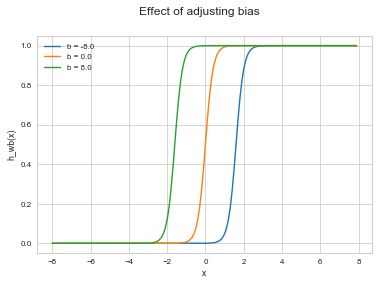

In [8]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.gcf().suptitle('Effect of adjusting bias')

plt.show()

## Putting together the structure


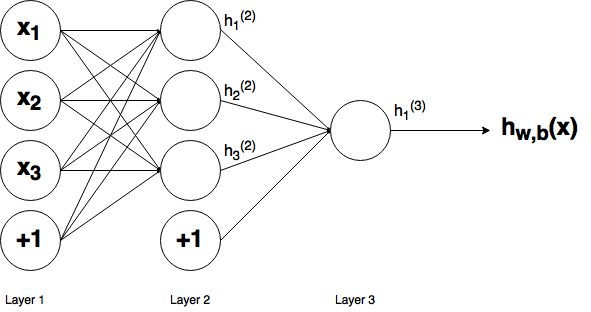

In [15]:
from IPython.display import Image, HTML
display(HTML('<strong> ANN structure </strong>'))
Image(filename='three-layer-network.png', width=300, height=300) 


## The notation

# The feed-forward pass

$$h_1^{(2)} = f(w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + w_{13}^{(1)}x_3 + b_1^{(1)})$$
$$h_2^{(2)} = f(w_{21}^{(1)}x_1 + w_{22}^{(1)}x_2 + w_{23}^{(1)}x_3 + b_2^{(1)})$$
$$h_3^{(2)} = f(w_{31}^{(1)}x_1 + w_{32}^{(1)}x_2 + w_{33}^{(1)}x_3 + b_3^{(1)})$$
$$h_{w, b}(x) = h_1^{(3)}= f(w_{11}^{(2)}h_1^{(2)} + w_{12}^{(2)}h_2^{(2)} + w_{13}^{(2)}h_3^{(2)} + b_1^{(2)})$$

## A feed-forward example

$$W^{(1)} = \begin{pmatrix}w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)}\\w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)}\\w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}\end{pmatrix}$$

In [1]:
import numpy as np
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])

$$W^{(2)} = \begin{pmatrix}w_{11}^{(2)} & w_{12}^{(2)} & w_{13}^{(2)}\end{pmatrix}$$

In [2]:
w2 = np.zeros((1, 3))
w2[0,:] = np.array([0.5, 0.5, 0.5])

In [3]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

In [4]:
def f(x):
    return 1 / (1 + np.exp(-x))



## Our first attempt at a feed-forward function

In [5]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        #Setup the input array which the weights will be multiplied by for each layer
        #If it's the first layer, the input array will be the x input vector
        #If it's not the first layer, the input to the next layer will be the 
        #output of the previous layer
        if l == 0:
            node_in = x
        else:
            node_in = h
        #Setup the output array for the nodes in layer l + 1
        h = np.zeros((w[l].shape[0],))
        #loop through the rows of the weight array
        for i in range(w[l].shape[0]):
            #setup the sum inside the activation function
            f_sum = 0
            #loop through the columns of the weight array
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            #add the bias
            f_sum += b[l][i]
            #finally use the activation function to calculate the
            #i-th output i.e. h1, h2, h3
            h[i] = f(f_sum)
    return h

In [6]:
w = [w1, w2]
b = [b1, b2]
#a dummy x input vector
x = [1.5, 2.0, 3.0]



In [7]:
simple_looped_nn_calc(3, x, w, b)

array([0.83545566])

## More efficient implementation

In [8]:
%timeit simple_looped_nn_calc(3, x, w, b)

18.1 µs ± 386 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Vectorisation in neural networks

In [55]:
%%latex  
\begin{align}
z_1^{(2)} & = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + w_{13}^{(1)} x_3 + b_1^{(1)} \\ 
z_1^{(2)} & = \sum_{j = 1}^{n} w_{i j}^{(1)}x_i + b_i^{(1)}
\end{align}



<IPython.core.display.Latex object>

In [56]:
%%latex
    
\begin{align}
z^{(2)} & = W^{(1)}x + b^{(1)}\\
h^{(2)} & = f(z^{(2)}) \\
z^{(3)} & = W^{(2)}h^{(2)} + b^{(2)}\\
h_{W, b}(x) & = h^{(3)} = f(z^{(3)})
\end{align}

<IPython.core.display.Latex object>

## Matrix multiplication

$$z^{(2)} = \begin{pmatrix}w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)}\\w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)}\\w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}\end{pmatrix} \begin{pmatrix} x_1 \\x_2\\x_3\end{pmatrix} + \begin{pmatrix} b_1^{(1)} \\b_2^{(1)}\\b_3^{(1)}\end{pmatrix}$$

$$z^{(2)} = \begin{pmatrix}w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + w_{13}^{(1)}x_3 + b_1^{(1)}\\
w_{21}^{(1)}x_1 + w_{22}^{(1)}x_2 + w_{23}^{(1)}x_3 + b_2^{(1)}\\
w_{31}^{(1)}x_1 + w_{32}^{(1)}x_2 + w_{33}^{(1)}x_3 + b_3^{(1)}
\end{pmatrix}$$

In [9]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

In [10]:
%timeit matrix_feed_forward_calc(3, x, w, b)

9.55 µs ± 94.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Gradient Descent and Optimization

$$w_{new} = w_{old} - \alpha * \nabla_{error}$$

## Simple Example

In [40]:
x_old = 0 # The value does not matter as long as abs(x_new - x_old) > precision
x_new = 6 # The algorithm starts at x=6
gamma = 0.01 # step size
precision = 0.0001

def df(x):
    y = 4 * x**3 - 9 * x**2
    return y
rows = []
i = 0
while abs(x_new - x_old) > precision:
    x_old = x_new
    row_template = {'iter':i, 'x_old': None, 'df(x_old)': None}
    row_template['x_old'], row_template['df(x_old)'] = x_old, df(x_old)
    rows.append(row_template)
    x_new += -gamma * df(x_old)
    i += 1

print("The local minimum occurs at %f" % x_new)

The local minimum occurs at 2.249660


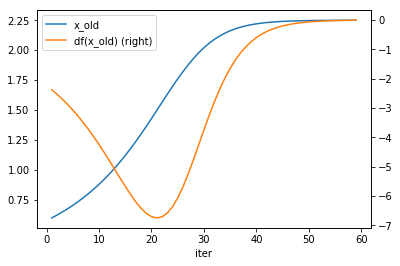

In [41]:
import pandas as pd
df = pd.DataFrame(rows)
ax = df.iloc[1:,:].plot(y='x_old',x='iter')
df.iloc[1:,:].plot(y='df(x_old)',x='iter', ax=ax, secondary_y=True)
# df.head()

## The cost function
$$J(w,b) = \frac{1}{m}\sum_{z=0}^{m} \left\lVert y^z - h^{n_l}(x^z) \right\rVert^2$$
$$J(w,b) = \frac{1}{m}\sum_{z=0}^{m} J(W, b, x^{(z)}, y^{(z)})$$

## Gradient Descent in Neural Networks

$$w_{ij}^{(l)} = w_{ij}^{(l)} - \alpha \frac{\partial}{\partial w_{ij}^{(l)}} J(w,b)$$
$$b_{i}^{(l)} = b_{i}^{(l)} - \alpha \frac{\partial}{\partial b_{i}^{(l)}} J(w,b)$$

__Example:__
$$\frac{\partial J}{\partial w_{12}^{(2)}} = \frac{\partial J}{\partial h_{1}^{(3)}} \frac{\partial h_{1}^{(3)}}{\partial z_1^{(2)}} \frac{\partial z_1^{(2)}}{\partial w_{12}^{(2)}}$$
  



In [63]:
%%latex
\begin{align}
z_1^{(2)} & = w_{11}^{(2)} h_1^{(2)} + w_{12}^{(2)} h_2^{(2)} + w_{13}^{(2)} h_3^{(2)} + b_1^{(2)}\\

\frac{\partial z_{1}^{(2)}}{\partial w_{12}^{(2)}} & = \frac{\partial}{\partial w_{12}^{(2)}}(w_{11}^{(2)} h_1^{(2)} + w_{12}^{(2)} h_2^{(2)} + w_{13}^{(2)} h_3^{(2)} + b_1^{(2)})\\

\frac{\partial z_{1}^{(2)}}{\partial w_{12}^{(2)}} & = \frac{\partial}{\partial w_{12}^{(2)}}(w_{12}^{(2)} h_2^{(2)})\\

\frac{\partial z_{1}^{(2)}}{\partial w_{12}^{(2)}} & = h_2^{(2)}
\end{align}

<IPython.core.display.Latex object>

In [74]:
%%latex
\begin{align}

\frac{\partial h}{\partial z} & = f^\prime (z) = \frac{d}{dz} \left( \frac{1}{1+e^{-z}} \right)\\
\frac{\partial h}{\partial z} & = \frac{e^{-z}}{(1+e^{-z})^2}\\
& = \frac{1+e^{-z}-1}{(1+e^{-z})^2}\\
& = \frac{1+e^{-z}}{(1+e^{-z})^2}-\frac{1}{(1+e^{-z})^2}\\
& = \frac{1}{(1+e^{-z})}-\frac{1}{(1+e^{-z})^2}\\
& = \left( 1-\frac{1}{(1+e^{-z})} \right)\frac{1}{(1+e^{-z})}\\
\frac{\partial h}{\partial z}  & = f(z) (1-f(z))
\end{align}

<IPython.core.display.Latex object>

$$J(w, b, x, y) = \frac{1}{2}  \left\lVert y_1 - h_1^{(3)}z_1^{(2)} \right\rVert^2 $$

$$\frac{\partial J}{\partial h} = - (y_1 - h_1^{(3)})$$



$$\frac{\partial J}{\partial w_{12}^{(2)}} = \frac{\partial J}{\partial h_{1}^{(3)}} \frac{\partial h_{1}^{(3)}}{\partial z_1^{(2)}} \frac{\partial z_1^{(2)}}{\partial w_{12}^{(2)}}$$



$$\frac{\partial J}{\partial w_{12}^{(2)}} = - (y_1 - h_1^{(3)}) \space  f^\prime (z) \space h_2^{(2)} $$
$$\frac{\partial J}{\partial w_{12}^{(2)}} = \delta_1^{(3)} \space h_2^{(2)} $$
$$\frac{\partial J}{\partial w_{ij}^{(l)}} = h_j^{(l)} \delta_i^{(l+1)} $$